<a href="https://colab.research.google.com/github/Davioliveira1305/LBI/blob/main/LBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
global var, lista_pesos, lista_pesos_restr, capacidade
var = int(input('Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: '))
lista_pesos = []
for i in range(var):
  peso = int(input(f'Informe o peso da variável x{i + 1} na função objetivo: '))
  lista_pesos.append(peso)
lista_pesos_restr = []
for i in range(var):
  peso_restr = int(input(f'Informe o peso da variável x{i + 1} na restrição: '))
  lista_pesos_restr.append(peso_restr)
capacidade = int(input('Informe a capacidade da mochila: '))

Diga-me quantas variavéis de decisão possui seu problema da mochila 0-1: 4
Informe o peso da variável x1 na função objetivo: 10
Informe o peso da variável x2 na função objetivo: 6
Informe o peso da variável x3 na função objetivo: 12
Informe o peso da variável x4 na função objetivo: 7
Informe o peso da variável x1 na restrição: 4
Informe o peso da variável x2 na restrição: 2
Informe o peso da variável x3 na restrição: 6
Informe o peso da variável x4 na restrição: 3
Informe a capacidade da mochila: 10


In [55]:
def funcao_tran(estado, dominio, var):
  valor_estado = (estado + dominio * lista_pesos_restr[var - 1])
  if valor_estado <= capacidade: return (True, valor_estado)
  return (False, 0)

In [56]:
grafo = nx.DiGraph()
class no:
  def __init__(self, estado):
    self.estado = estado

<ipython-input-58-91ee35adb8db>:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(grafo, prog="dot", root=raiz.estado)


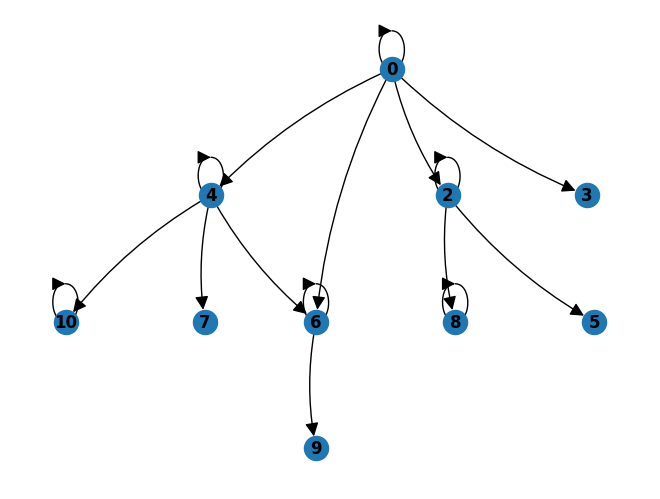

In [58]:
raiz = no(0)
grafo.add_node(raiz.estado)
Lista_camadas = [[raiz]]
dominio = [0, 1]
for i in range(1, var + 1):
  Lista_camadas.append([])
  for j in Lista_camadas[i - 1]:
    for d in dominio:
      estado, valor_estado = funcao_tran(j.estado, d, i)
      if estado == True:
        node = no(valor_estado)
        grafo.add_node(node.estado)
        Lista_camadas[i].append(node)
        grafo.add_edge(j.estado, node.estado)
pos = nx.drawing.nx_pydot.graphviz_layout(grafo, prog="dot", root=raiz.estado)
nx.draw(grafo, pos, with_labels=True, font_weight='bold', arrowsize=20, connectionstyle='arc3,rad=0.1')
plt.show()


In [ ]:
m = node(4)

TypeError: 'node' object is not callable